In [10]:
import matplotlib.pyplot as plt
import cv2
import os
from datetime import datetime
import time
from ultralytics import YOLO


image 1/1 c:\Users\adity\OneDrive\Desktop\Rucha\image copy 2.png: 448x640 1 leaning_to_copy, 1 looking_around, 451.7ms
Speed: 1.9ms preprocess, 451.7ms inference, 3.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict5
image 1/1 c:\Users\adity\OneDrive\Desktop\Rucha\image copy 2.png: 448x640 1 leaning_to_copy, 1 looking_around, 451.7ms
Speed: 1.9ms preprocess, 451.7ms inference, 3.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict5
Found saved image: runs\detect\predict5\image copy 2.jpg
Found saved image: runs\detect\predict5\image copy 2.jpg


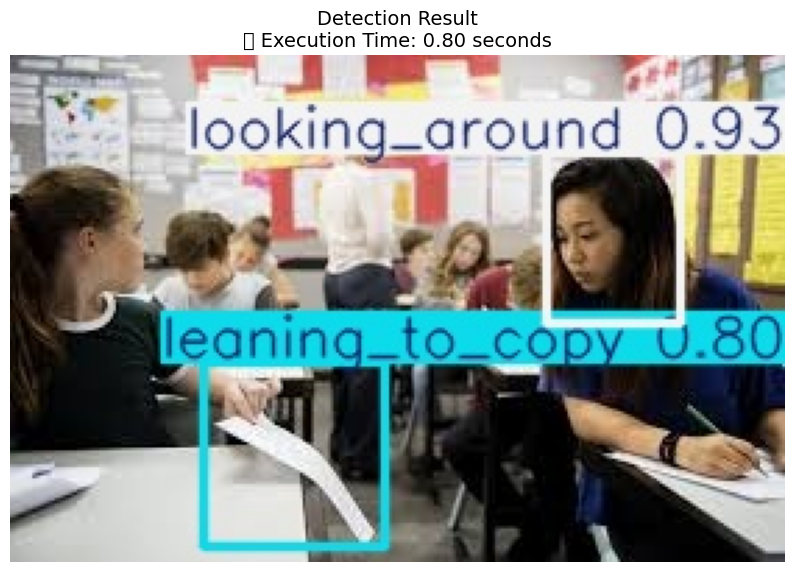

In [11]:
model=YOLO('cheating_model_best.pt')


# Start timing
start_time = time.time()

# Run inference
results = model('image copy 2.png', save=True, conf=0.5)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Get saved image path
save_dir = results[0].save_dir

# Find the actual saved image file (it might be saved as .jpg instead of .png)
image_files = [f for f in os.listdir(save_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if image_files:
    img_path = os.path.join(save_dir, image_files[0])  # Use the first image found
    print(f"Found saved image: {img_path}")
    
    # Read and display the annotated image
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Plotting with execution time
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Detection Result\n⏱ Execution Time: {execution_time:.2f} seconds", fontsize=14)
        plt.show()
    else:
        print(f"Could not read image from: {img_path}")
else:
    print(f"No image files found in: {save_dir}")
    print(f"Contents of save directory: {os.listdir(save_dir)}")

In [12]:
# Define class names for the cheating detection model
class_names = {
    0: 'using_phone',
    1: 'leaning_to_copy', 
    2: 'looking_around',
    3: 'sharing_answers'
}

# Display detection results
print("Detection Results:")
print("-" * 50)

if len(results[0].boxes) > 0:
    for i, box in enumerate(results[0].boxes):
        class_id = int(box.cls[0])
        confidence = float(box.conf[0])
        class_name = class_names.get(class_id, f"Unknown (ID: {class_id})")
        
        print(f"Detection {i+1}:")
        print(f"  Class: {class_name}")
        print(f"  Confidence: {confidence:.2f} ({confidence*100:.1f}%)")
        print(f"  Bounding Box: {box.xyxy[0].tolist()}")
        print()
else:
    print("No detections found in the image.")
    print("This could mean:")
    print("- No cheating behavior was detected")
    print("- The confidence threshold (0.5) was too high")
    print("- The image quality or angle wasn't suitable for detection")

print(f"\nTotal detections: {len(results[0].boxes)}")
print(f"Image processed: {results[0].path}")
print(f"Results saved to: {results[0].save_dir}")

Detection Results:
--------------------------------------------------
Detection 1:
  Class: looking_around
  Confidence: 0.93 (92.8%)
  Bounding Box: [192.94459533691406, 35.029090881347656, 240.53756713867188, 96.64110565185547]

Detection 2:
  Class: leaning_to_copy
  Confidence: 0.80 (79.5%)
  Bounding Box: [69.64418029785156, 110.18513488769531, 134.0326690673828, 176.39065551757812]


Total detections: 2
Image processed: c:\Users\adity\OneDrive\Desktop\Rucha\image copy 2.png
Results saved to: runs\detect\predict5
